In [24]:
from PyPDF2 import PdfReader
import PyPDF2
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import google.generativeai as genai
from langchain.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.question_answering import load_qa_chain
from langchain.prompts import PromptTemplate
from dotenv import load_dotenv

In [25]:
def readCataractPdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_pages = len(reader.pages)
        print(num_pages)
        text = ''
        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

In [26]:
def chunksCataractRepository(text):
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
    chunks = text_splitter.split_text(text)
    return chunks

In [27]:
def VectorCatarct(text_chunks):
    embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")
    vector_store = FAISS.from_texts(text_chunks, embedding=embeddings)
    vector_store.save_local("D:/GAI/faiss_index")

In [28]:
def get_conversational_chain():

    prompt_template = """
    Answer the question as detailed as possible from the provided context, 
    make sure to provide all the details, 
    if the answer is not in
    provided context just say, 
    "answer is not available in the context", don't provide the wrong answer\n\n
    Context:\n {context}?\n
    Question: \n{question}\n

    Answer:
    """

    model = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.3)

    prompt = PromptTemplate(template = prompt_template, input_variables = ["context", "question"])
    chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

    return chain

In [29]:
FAISS.allow_dangerous_deserialization = True
def Response(user_question):
    embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")
    #new_db = FAISS.load_local("D:/GAI/faiss_index", embeddings)
    new_db = FAISS.load_local("D:/GAI/faiss_index", embeddings, allow_dangerous_deserialization=True)
    #new_db.allow_dangerous_deserialization = True
    docs = new_db.similarity_search(user_question)

    chain = get_conversational_chain()

    
    response = chain(
        {"input_documents":docs, "question": user_question}
        , return_only_outputs=True)

    #print(response)
    #print("=======")
    #print(response["output_text"])
    return response["output_text"]
    #st.write("Reply: ", response["output_text"])

In [30]:
CataractInfo = readCataractPdf('D:\GAI\cataract.pdf')
#print(pdf_text)

3


In [31]:
CataractChunks = chunksCataractRepository(CataractInfo)
print(CataractChunks)

['Overview: Cataracts  \nLast Update:  November 22, 2022; Next update: 2025.  \nIntroduction  \nA cataract  is an eye condition in which the lens of the eye becomes cloudy. This causes vision to \nworsen, making it especially difficult to see fine details clearly. Some people’s vision is only \nslightly affected, whereas others might lose their eyesight very quickl y. \nCataracts mostly affect people over 50. The risk increases with age: About 20 out of 100 people \nbetween the ages of 65 and 74 have a  cataract . And more than 50 out of 100 people over the age \nof 74 are affected.  \nCataracts are the main cause of blindness in developing countries. The number of people who go \nblind from cataracts is considerably lower in industrialized countries due to the availability of \neffective surgery. Cataract surgery involves removing the cloud y eye lens and replacing it with \nan artificial lens.  \nSymptoms  \nVision loss due to cataracts is usually very gradual. That is the only sympt

In [32]:
VectorCatarct(CataractChunks)

In [33]:
Question = input("Ask a Question About Cataract Disease: ")

Ask a Question About Cataract Disease:  What aspect of vision is affected besides clarity?


In [34]:
Answer=Response(Question)

In [35]:
Answer

'Spatial vision is affected as well.'

In [31]:
import pandas as pd
# Read the contents of the file
file_path = r"D:\GAI\QAns.txt"  # Update with your file path
with open(file_path, 'r') as file:
    lines = file.readlines()
questions = []
answers = []
for line in lines:
    if '?' in line:
        questions.append(line.strip())
       
    else:
        answers.append(line.strip())
     


In [32]:
df = pd.DataFrame({'Question': questions, 'Answer': answers})

In [33]:
df.to_csv(r"D:\GAI\Dataset.csv", index=False)

In [215]:
predAns=[]
for i in range(0, 11):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

#for q in questions:
 #   print(q)
    #ans=user_input(q)
    #print(ans)
    #predAns.append(ans)
        

0
What is the primary cause of blindness in developing countries?
Cataracts
1
Are cataracts the leading factor in blindness among developing nations?
Yes, cataracts are the main cause of blindness in developing countries.
2
Which condition accounts for the majority of blindness cases in developing countries?
Cataracts
3
Do cataracts contribute significantly to blindness rates in developing nations?
Yes, cataracts are the main cause of blindness in developing countries.
4
Are cataracts predominantly responsible for blindness in low-income countries?
Yes, cataracts are the main cause of blindness in developing countries.
5
In developing nations, what is the main reason for blindness?
Cataracts
6
Are cataracts the primary cause of vision loss in less economically developed regions?
Yes, cataracts are the main cause of blindness in developing countries.
7
What is the most common cause of blindness in countries with limited resources?
Cataracts
8
Do cataracts play a major role in causing bl

In [216]:
for i in range(11, 20):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

11
Are cataracts typically painful?
No, cataracts are not typically painful.
12
Do cataracts cause burning sensations or similar symptoms?
No, cataracts do not cause burning or any similar symptoms.
13
How does vision change with cataracts over time?
Vision becomes increasingly blurred and cloudy, as if they are looking through fog. Contrasts and colors become less clear as time goes on. Some people become very sensitive to the glare of the sun or other bright lights. Driving becomes more difficult, particularly at night. Poor vision increases the risk of falling and hurting yourself. Spatial vision is affected as well.
14
What happens to contrasts and colors as cataracts progress?
Contrasts and colors become less clear as time goes on.
15
How do some individuals react to bright lights when they have cataracts?
Some people become very sensitive to the glare of the sun or other bright lights.
16
What activity becomes more challenging, especially at night, with cataracts?


StopCandidateException: index: 0
finish_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: MEDIUM
}


In [47]:
ans=user_input(questions[18])

In [51]:
predAns=[]

In [52]:

for i in range(18, 20):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

18
What aspect of vision is affected besides clarity?
Answer is not available in the context
19
Can cataracts cause changes in refractive power, affecting the need for glasses?
Yes, cataracts can cause changes in refractive power, affecting the need for glasses.


In [53]:

for i in range(20, 30):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

20
What is the main cause of a "senile" cataract in about 90% of cases?
Aging
21
What can cause cataracts to develop earlier in some families?
Answer is not available in the context
22
In what rare scenario might a baby be born with cataracts?
A baby might be born with cataracts if the mother gets measles or rubella (German measles) during the pregnancy.
23
What environmental factors may increase the risk of developing cataracts?
UV light from the sun
24
Which medical condition is associated with a higher risk of cataracts?
Diabetes
25
What factors contribute to the prevalence of cataracts in developing countries?
malnutrition and poor living conditions
26
What can lead to the development of cataracts following an inflammation or injury to the eye?
Answer is not available in the context
27
Besides inflammation or injury, what else can lead to the development of cataracts?
Eye surgery and long-term use of certain medications
28
What might increase the risk of cataracts after long-term u

In [54]:
for i in range(30, 40):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

30
What needs to be ruled out before diagnosing cataracts due to various reasons for vision deterioration?
Other possible causes need to be ruled out before cataracts can be diagnosed.
31
What does an eye doctor typically inquire about during the initial consultation?
Your eye doctor (ophthalmologist) will first ask you about your symptoms and your general  medical history.
32
What type of examination is used to inspect the lens of the eye?
Slit lamp examination
33
How is the eye examined using a slit lamp described?


StopCandidateException: index: 0
finish_reason: RECITATION


In [55]:
for i in range(34, 40):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

34
What is used to dilate pupils for examining the back of the eye?
Medication
35
How long do pupils typically stay dilated after medication?
A few hours
36
What might be affected during the time when pupils are dilated?
It is difficult to focus properly and you will be more sensitive to light and glare.
37
Why should driving be avoided for a few hours after pupil dilation?
Answer is not available in the context
38
How long is it recommended to wait before driving after pupil dilation?
4 to 5 hours
39
What precaution should be taken if unsure about the return of normal vision after pupil dilation?
It is better not to drive.


In [56]:
for i in range(40, 50):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

40
Are there specific preventive measures scientifically proven to lower the risk of developing cataracts?
No, there are no scientific studies showing that particular preventive measures lower the risk of developing cataracts.
41
What is believed to increase the risk of cataracts, potentially decreasing with cessation?
Smoking is believed to increase the risk of cataracts, potentially decreasing with cessation
42
How can individuals exposed to significant UV light protect their eyes from the sun?
Individuals exposed to significant UV light can protect their eyes from the sun by wearing sunglasses.
43
Which type of medications might increase the risk of developing cataracts?


StopCandidateException: index: 0
finish_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: MEDIUM
}


In [58]:
for i in range(44, 50):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

44
What action might be considered regarding steroid medications and cataract risk?
It might be possible to switch to a different medication.
45
What options do some individuals have to compensate for vision loss caused by cataracts?
Some people can compensate for the vision loss – temporarily or even in the longer term – by wearing glasses or contact lenses.
46
Are there medications available for the treatment of cataracts?
No, there are no medications available for the treatment of cataracts.
47
What is the only effective treatment for cataracts?
The only effective treatment for cataracts is surgery.
48
What does cataract surgery involve?
Cataract surgery involves removing the cloudy lens and replacing it with a new, artificial lens.
49
What part of the eye is left intact during cataract surgery?
lens capsule


In [59]:
df = pd.DataFrame(predAns, columns=['Predicted Answer'])
df.to_csv('D:\GAI\PredictedAns.csv', index=False)

In [61]:
for i in range(51, 54):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

51
What is implanted into the lens capsule after the cloudy lens is removed?
An artificial lens is implanted into the lens capsule after the cloudy lens is removed.
52
What is the standard surgical technique for cataract removal in some countries?
Phacoemulsification
53
In addition to phacoemulsification, what other surgical option is sometimes offered for cataracts?
Laser surgery


In [62]:
for i in range(54, 55):
    print(i)
    print(questions[i])
    ans=user_input(questions[i])
    print(ans)
    predAns.append(ans)

54
What is the standard surgical technique for cataract removal in some countries?
Phacoemulsification


In [63]:
df = pd.DataFrame(predAns, columns=['Predicted Answer'])
df.to_csv('D:\GAI\PredictedAns.csv', index=False)

In [70]:
questions[50]

'How are the cloudy portions of the lens removed during surgery?'

In [71]:
import pandas as pd



In [73]:

# Read the CSV file
df = pd.read_csv('D:\GAI\PredictedAnsAll.csv')



In [89]:
df['Actual Ans']

0                                             Cataracts
1                                                   Yes
2                                             Cataracts
3                                                   Yes
4                                                   Yes
5                                             Cataracts
6                                                   Yes
7                                             Cataracts
8                                                   Yes
9                                                   Yes
10                                              Gradual
11                                                   No
12                                                   No
13                                   Blurred and cloudy
14                                           Less clear
15                                            Sensitive
16                                              Driving
17                                              

In [77]:
print(df['Predicted Answer'])

0                                             Cataracts
1     Yes, cataracts are the main cause of blindness...
2                                             Cataracts
3     Yes, cataracts are the main cause of blindness...
4     Yes, cataracts are the main cause of blindness...
5                                             Cataracts
6     Yes, cataracts are the main cause of blindness...
7                                             Cataracts
8     Yes, cataracts are the main cause of blindness...
9     Yes, cataracts are the main cause of blindness...
10    Vision loss due to cataracts is usually very g...
11             No, cataracts are not typically painful.
12    No, cataracts do not cause burning or any simi...
13    Vision becomes increasingly blurred and cloudy...
14    Contrasts and colors become less clear as time...
15    Some people become very sensitive to the glare...
16                                                   no
17                                              

In [91]:
from rouge_score import rouge_scorer

In [110]:
def calculate_similarity(str1, str2):
    # Split the strings into words
    str2 = str2.replace(',', '')
    str2 = str2.replace('.', '')
    str1 = str1.replace(',', '')
    str1 = str1.replace('.', '')
    words_str1 = set(str1.split())
    words_str2 = set(str2.split())
    words_str1 = {word.lower() for word in words_str1 if not isinstance(word, float)}
    words_str2 = {word.lower() for word in words_str2 if not isinstance(word, float)}
    # Check if all words from str1 are present in str2
    if words_str1.issubset(words_str2):
        return 100
    
    # Calculate the intersection of words between the two strings
    common_words = words_str1.intersection(words_str2)
    
    # Calculate the percentage of words from str1 present in str2
    similarity_percentage = (len(common_words) / len(words_str1)) * 100
    
    return similarity_percentage

In [ ]:
rouge1_precision = scores['rouge1'].precision
rouge1_recall = scores['rouge1'].recall

rouge2_precision = scores['rouge2'].precision
rouge2_recall = scores['rouge2'].recall

rougeL_precision = scores['rougeL'].precision
rougeL_recall = scores['rougeL'].recall

# Print precision and recall scores
print("ROUGE-1 Precision:", rouge1_precision)
print("ROUGE-1 Recall:", rouge1_recall)

print("ROUGE-2 Precision:", rouge2_precision)
print("ROUGE-2 Recall:", rouge2_recall)

print("ROUGE-L Precision:", rougeL_precision)
print("ROUGE-L Recall:", rougeL_recall)

In [136]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge1p=[]
rouge1r=[]
rouge2p=[]
rouge2r=[]
rougeLp=[]
rougeLr=[]
simlarity=[]
pred=[]
actual=[]
i=0
for p in df['Predicted Answer']:
    print("============" + str(i))
    print("Predicted")
    print(p)
    print("Actual")
    print(df['Actual Ans'][i])
    if( str(p) != "nan"):
        scores = scorer.score(df['Actual Ans'][i], p)
        rouge1_precision = scores['rouge1'].precision
        rouge1_recall = scores['rouge1'].recall
        rouge2_precision = scores['rouge2'].precision
        rouge2_recall = scores['rouge2'].recall
        rougeL_precision = scores['rougeL'].precision
        rougeL_recall = scores['rougeL'].recall
        print("ROUGE-1 Precision:", rouge1_precision)
        print("ROUGE-1 Recall:", rouge1_recall)
        print("ROUGE-2 Precision:", rouge2_precision)
        print("ROUGE-2 Recall:", rouge2_recall)
        print("ROUGE-L Precision:", rougeL_precision)
        print("ROUGE-L Recall:", rougeL_recall)
        rouge1p.append(rouge1_precision)
        rouge1r.append(rouge1_recall)
        rouge2p.append(rouge2_precision)
        rouge2r.append(rouge2_recall)
        rougeLp.append(rougeL_precision)
        rougeLr.append(rougeL_recall)
        sim=calculate_similarity(df['Actual Ans'][i], p)
        print(sim)
        simlarity.append(sim)
    else:
        print("ROUGE-1 Precision:", 0)
        print("ROUGE-1 Recall:", 0)
        print("ROUGE-2 Precision:", 0)
        print("ROUGE-2 Recall:", 0)
        print("ROUGE-L Precision:", 0)
        print("ROUGE-L Recall:", 0)
        rouge1p.append(0)
        rouge1r.append(0)
        rouge2p.append(0)
        rouge2r.append(0)
        rougeLp.append(0)
        rougeLr.append(0)
        print(0)
        simlarity.append(0)
        sim=0
    if sim>=0.5:
        pred.append(1)
        actual.append(1)
    else:
        pred.append(0)
        actual.append(1)
      
    i=i+1

============0
Predicted
Cataracts
Actual
Cataracts
ROUGE-1 Precision: 1.0
ROUGE-1 Recall: 1.0
ROUGE-2 Precision: 0.0
ROUGE-2 Recall: 0.0
ROUGE-L Precision: 1.0
ROUGE-L Recall: 1.0
100
============1
Predicted
Yes, cataracts are the main cause of blindness in developing countries.
Actual
Yes
ROUGE-1 Precision: 0.09090909090909091
ROUGE-1 Recall: 1.0
ROUGE-2 Precision: 0.0
ROUGE-2 Recall: 0.0
ROUGE-L Precision: 0.09090909090909091
ROUGE-L Recall: 1.0
100
============2
Predicted
Cataracts
Actual
Cataracts
ROUGE-1 Precision: 1.0
ROUGE-1 Recall: 1.0
ROUGE-2 Precision: 0.0
ROUGE-2 Recall: 0.0
ROUGE-L Precision: 1.0
ROUGE-L Recall: 1.0
100
============3
Predicted
Yes, cataracts are the main cause of blindness in developing countries.
Actual
Yes
ROUGE-1 Precision: 0.09090909090909091
ROUGE-1 Recall: 1.0
ROUGE-2 Precision: 0.0
ROUGE-2 Recall: 0.0
ROUGE-L Precision: 0.09090909090909091
ROUGE-L Recall: 1.0
100
============4
Predicted
Yes, cataracts are the main cause of blindness in developing cou

In [ ]:
ScoreDF = pd.DataFrame({'Rouge-1P': rouge1p, 'Rouge-1R': rouge1r,'Rouge-2P': rouge2p, 'Rouge-2r': rouge2r,'Rouge-LP': rougeLp, 'Rouge-Lr': rougeLr,' Similarity': simlarity})
ScoreDF.to_csv(r"D:\GAI\ActualPredScore.csv", index=False)

In [121]:

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge1=[]
rougeL=[]
simlarity=[]
pred=[]
actual=[]
i=0
for p in df['Predicted Answer']:
    print("============" + str(i))
    print("Predicted")
    print(p)
    print("Actual")
    print(df['Actual Ans'][i])
    if( str(p) != "nan"):
        scores = scorer.score(df['Actual Ans'][i], p)
        print("ROUGE-1 F1 Score:", scores['rouge1'].fmeasure)
        print("ROUGE-L F1 Score:", scores['rougeL'].fmeasure)
        rouge1.append(scores['rouge1'].fmeasure)
        rougeL.append(scores['rougeL'].fmeasure)
        sim=calculate_similarity(df['Actual Ans'][i], p)
        print(sim)
        simlarity.append(sim)
    else:
        print("ROUGE-1 F1 Score:", 0)
        print("ROUGE-L F1 Score:", 0)
        rouge1.append(0)
        rougeL.append(0)
        print(0)
        simlarity.append(0)
        sim=0
    if sim>=0.5:
        pred.append(1)
        actual.append(1)
    else:
        pred.append(0)
        actual.append(1)
      
    i=i+1
    
    

============0
Predicted
Cataracts
Actual
Cataracts
ROUGE-1 F1 Score: 1.0
ROUGE-L F1 Score: 1.0
100
============1
Predicted
Yes, cataracts are the main cause of blindness in developing countries.
Actual
Yes
ROUGE-1 F1 Score: 0.16666666666666669
ROUGE-L F1 Score: 0.16666666666666669
100
============2
Predicted
Cataracts
Actual
Cataracts
ROUGE-1 F1 Score: 1.0
ROUGE-L F1 Score: 1.0
100
============3
Predicted
Yes, cataracts are the main cause of blindness in developing countries.
Actual
Yes
ROUGE-1 F1 Score: 0.16666666666666669
ROUGE-L F1 Score: 0.16666666666666669
100
============4
Predicted
Yes, cataracts are the main cause of blindness in developing countries.
Actual
Yes
ROUGE-1 F1 Score: 0.16666666666666669
ROUGE-L F1 Score: 0.16666666666666669
100
============5
Predicted
Cataracts
Actual
Cataracts
ROUGE-1 F1 Score: 1.0
ROUGE-L F1 Score: 1.0
100
============6
Predicted
Yes, cataracts are the main cause of blindness in developing countries.
Actual
Yes
ROUGE-1 F1 Score: 0.166666666666666

In [123]:
len(simlarity)

55

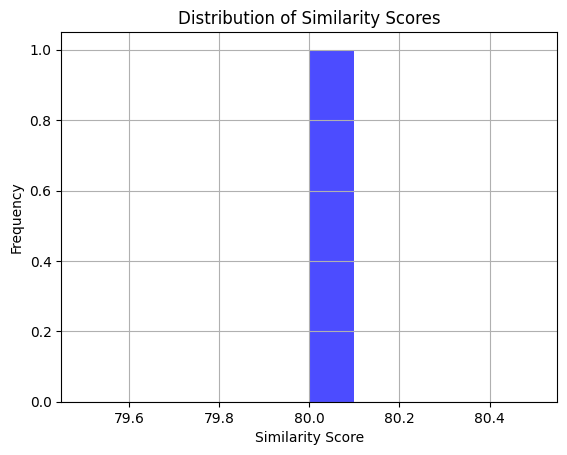

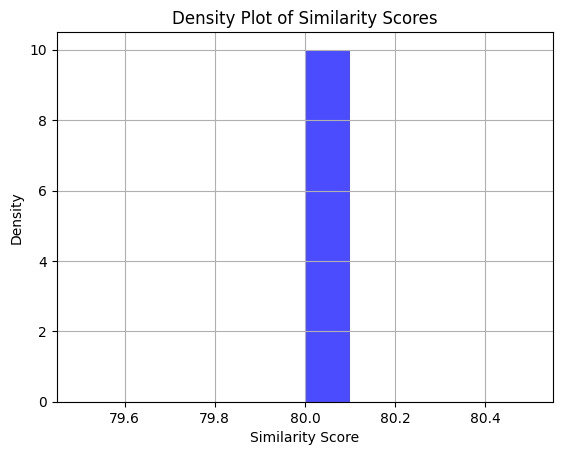

In [131]:

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(similarity, bins=10, color='blue', alpha=0.7)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores')
plt.grid(True)
plt.show()

# Plot density plot
plt.figure()
plt.hist(similarity, bins=10, density=True, color='blue', alpha=0.7)
plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.title('Density Plot of Similarity Scores')
plt.grid(True)
plt.show()





In [135]:
plt.figure()
plt.scatter(range(len(similarity)), similarity, color='blue', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.title('Scatter Plot of Similarity Scores')
plt.show()




TypeError: object of type 'float' has no len()

<Figure size 640x480 with 0 Axes>